# Boosting

## Libraries

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [3]:
base_path = "C:/Users/madsh/OneDrive/Dokumenter/kandidat/Fællesmappe/Forecasting-energy-consumption/Data/Results/Boosting/Metrics/"

# Paths to the CSV files
n12_100_1Y_results_path = f"{base_path}h=1_steps_ahead=12_nrounds=100_train_size=8784_XGB_Metrics.csv"
n12_100_2Y_results_path = f"{base_path}h=1_steps_ahead=12_nrounds=100_train_size=17544_XGB_Metrics.csv"
n24_100_1Y_results_path = f"{base_path}h=1_steps_ahead=24_nrounds=100_train_size=8784_XGB_Metrics.csv"
n24_100_2Y_results_path = f"{base_path}h=1_steps_ahead=24_nrounds=100_train_size=17544_XGB_Metrics.csv"
n48_100_1Y_results_path = f"{base_path}h=1_steps_ahead=48_nrounds=100_train_size=8784_XGB_Metrics.csv"
n48_100_2Y_results_path = f"{base_path}h=1_steps_ahead=48_nrounds=100_train_size=17544_XGB_Metrics.csv"
n168_100_1Y_results_path = f"{base_path}h=1_steps_ahead=168_nrounds=100_train_size=8784_XGB_Metrics.csv"
n168_100_2Y_results_path = f"{base_path}h=1_steps_ahead=168_nrounds=100_train_size=17544_XGB_Metrics.csv"
n720_100_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=100_train_size=8784_XGB_Metrics.csv"
n720_100_2Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=100_train_size=17544_XGB_Metrics.csv"
n720_200_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=200_train_size=8784_XGB_Metrics.csv"
n720_400_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=400_train_size=8784_XGB_Metrics.csv"
n720_800_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=800_train_size=8784_XGB_Metrics.csv"
n720_1000_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=1000_train_size=8784_XGB_Metrics.csv"
n720_1200_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=1200_train_size=8784_XGB_Metrics.csv"
n720_1400_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=1400_train_size=8784_XGB_Metrics.csv"
n720_1600_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=1600_train_size=8784_XGB_Metrics.csv"
n720_1800_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=1800_train_size=8784_XGB_Metrics.csv"
n720_2000_1Y_results_path = f"{base_path}h=1_steps_ahead=720_nrounds=2000_train_size=8784_XGB_Metrics.csv"

# Reading the CSV files into dataframes
n12_100_1Y_results = pd.read_csv(n12_100_1Y_results_path)
n12_100_2Y_results = pd.read_csv(n12_100_2Y_results_path)
n24_100_1Y_results = pd.read_csv(n24_100_1Y_results_path)
n24_100_2Y_results = pd.read_csv(n24_100_2Y_results_path)
n48_100_1Y_results = pd.read_csv(n48_100_1Y_results_path)
n48_100_2Y_results = pd.read_csv(n48_100_2Y_results_path)
n168_100_1Y_results = pd.read_csv(n168_100_1Y_results_path)
n168_100_2Y_results = pd.read_csv(n168_100_2Y_results_path)
n720_100_1Y_results = pd.read_csv(n720_100_1Y_results_path)
n720_100_2Y_results = pd.read_csv(n720_100_2Y_results_path)
n720_200_1Y_results = pd.read_csv(n720_200_1Y_results_path)
n720_400_1Y_results = pd.read_csv(n720_400_1Y_results_path)
n720_800_1Y_results = pd.read_csv(n720_800_1Y_results_path)
n720_1000_1Y_results = pd.read_csv(n720_1000_1Y_results_path)
n720_1200_1Y_results = pd.read_csv(n720_1200_1Y_results_path)
n720_1400_1Y_results = pd.read_csv(n720_1400_1Y_results_path)
n720_1600_1Y_results = pd.read_csv(n720_1600_1Y_results_path)
n720_1800_1Y_results = pd.read_csv(n720_1800_1Y_results_path)
n720_2000_1Y_results = pd.read_csv(n720_2000_1Y_results_path)


## Number of trees

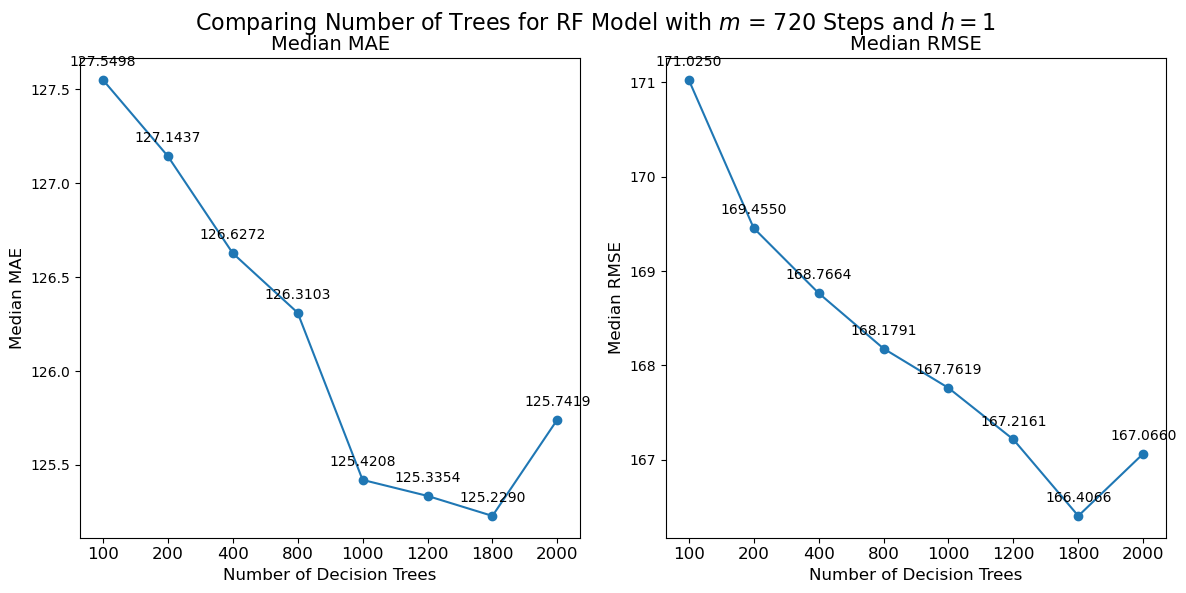

In [5]:
# Define a function to plot metrics for ntree datasets
def plot_metric(ax, metric_name):
    # Calculate median metric values for each ntree file
    median_metrics = {
        '100': n720_100_1Y_results[metric_name].median(),
        '200': n720_200_1Y_results[metric_name].median(),
        '400': n720_400_1Y_results[metric_name].median(),
        '800': n720_800_1Y_results[metric_name].median(),
       '1000': n720_1000_1Y_results[metric_name].median(),
       '1200': n720_1200_1Y_results[metric_name].median(),
       '1800': n720_1600_1Y_results[metric_name].median(),
       '2000': n720_1800_1Y_results[metric_name].median(),
    }

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(list(median_metrics.items()), columns=['ntree value', metric_name])

    # Scatter and line plot
    ax.scatter(df['ntree value'], df[metric_name], color='#1f77b4')
    ax.plot(df['ntree value'], df[metric_name], color='#1f77b4')

    # Annotating each point
    for i, txt in enumerate(df[metric_name]):
        ax.annotate(f"{txt:.4f}", (df['ntree value'][i], df[metric_name][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

    # Setting labels, title, and x-tick labels with a 45-degree rotation
    ax.set_title(f'{metric_name}', fontsize=14)
    ax.set_xlabel('Number of Decision Trees', fontsize=12)
    ax.set_ylabel(f'{metric_name}', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticklabels(df['ntree value'], fontsize = 12)

# Create a 1x2 subplot for MAE and RMSE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_metric(ax1, 'MAE')
plot_metric(ax2, 'RMSE')

# Adjust layout and add an overall title with Mathtext
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Comparing Number of Trees for Boosting Model with $m$ = 720 Steps and $h=1$', fontsize=16)

plt.show()

## Rolling window size

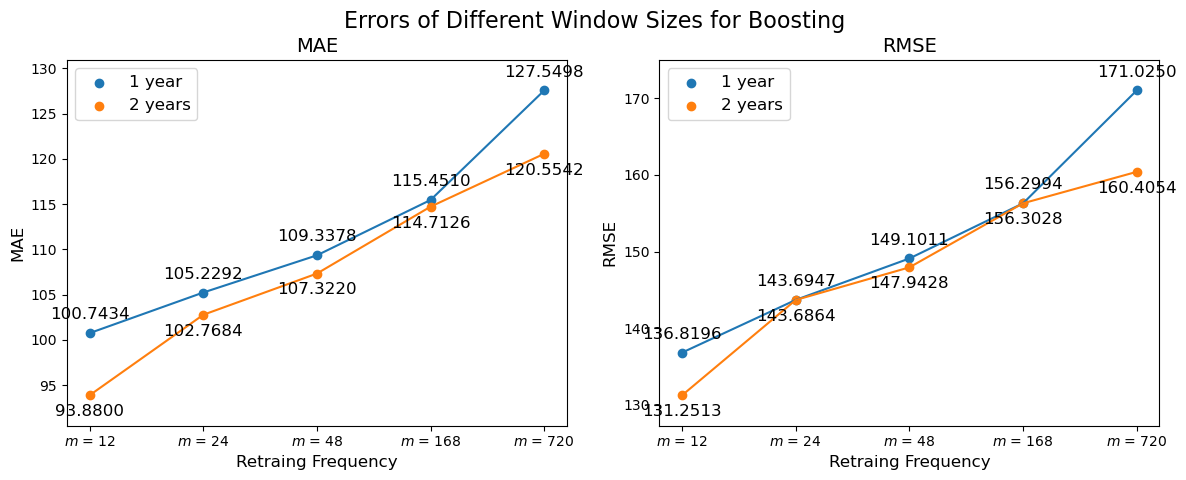

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metric(ax, metric_name):
    # Use Mathtext for R^2 in the title
    display_metric_name = metric_name

    # Calculate median metric values for each file
    median_metrics = {
        '12 steps':  [n12_100_1Y_results[metric_name].median(), n12_100_2Y_results[metric_name].median()],
        '24 steps':  [n24_100_1Y_results[metric_name].median(), n24_100_2Y_results[metric_name].median()],
        '48 steps':  [n48_100_1Y_results[metric_name].median(), n48_100_2Y_results[metric_name].median()],
        '168 steps': [n168_100_1Y_results[metric_name].median(), n168_100_2Y_results[metric_name].median()],
        '720 steps': [n720_100_1Y_results[metric_name].median(), n720_100_2Y_results[metric_name].median()],
    }

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(median_metrics, index=['1 year', '2 years']).T

    # Scatter and line plot for 1 year
    ax.scatter(df.index, df['1 year'], color='#1f77b4', label='1 year')
    ax.plot(df.index, df['1 year'], color='#1f77b4')

    # Scatter and line plot for 2 years
    ax.scatter(df.index, df['2 years'], color='#ff7f0e', label='2 years')
    ax.plot(df.index, df['2 years'], color='#ff7f0e')

    # Annotating each point
    for i, txt in enumerate(df['1 year']):
        ax.annotate(f"{txt:.4f}", (df.index[i], df['1 year'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
    for i, txt in enumerate(df['2 years']):
        ax.annotate(f"{txt:.4f}", (df.index[i], df['2 years'][i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=12)

    # Setting labels and title with Mathtext
    ax.set_title(f'{display_metric_name}', fontsize=14)
    ax.set_xlabel('Retraing Frequency', fontsize=12)
    ax.set_ylabel(f'{display_metric_name}', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Custom x-axis labels using LaTeX
    custom_labels = [f"$m$ = {label.split()[0]}" for label in df.index]
    ax.set_xticks(range(len(custom_labels)))  # Ensure x-ticks are correctly positioned
    ax.set_xticklabels(custom_labels)  # Set custom xtick labels with rotation

    # Adjusting y-axis limits
    min_val = df.min().min()
    max_val = df.max().max()
    buffer = (max_val - min_val) * 0.1  # Adding 10% buffer at the top and bottom
    ax.set_ylim(min_val - buffer, max_val + buffer)

    # Adding a legend
    ax.legend(fontsize=12)

# Create a 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_metric(ax1, 'MAE')
plot_metric(ax2, 'RMSE')

# Adjust layout and add an overall title with Mathtext
plt.tight_layout()
fig.subplots_adjust(top=0.85)  # Adjust the top space to accommodate the title
fig.suptitle('Errors of Different Window Sizes for Boosting', fontsize=16, y=.95)

plt.show()


## New rounds plot

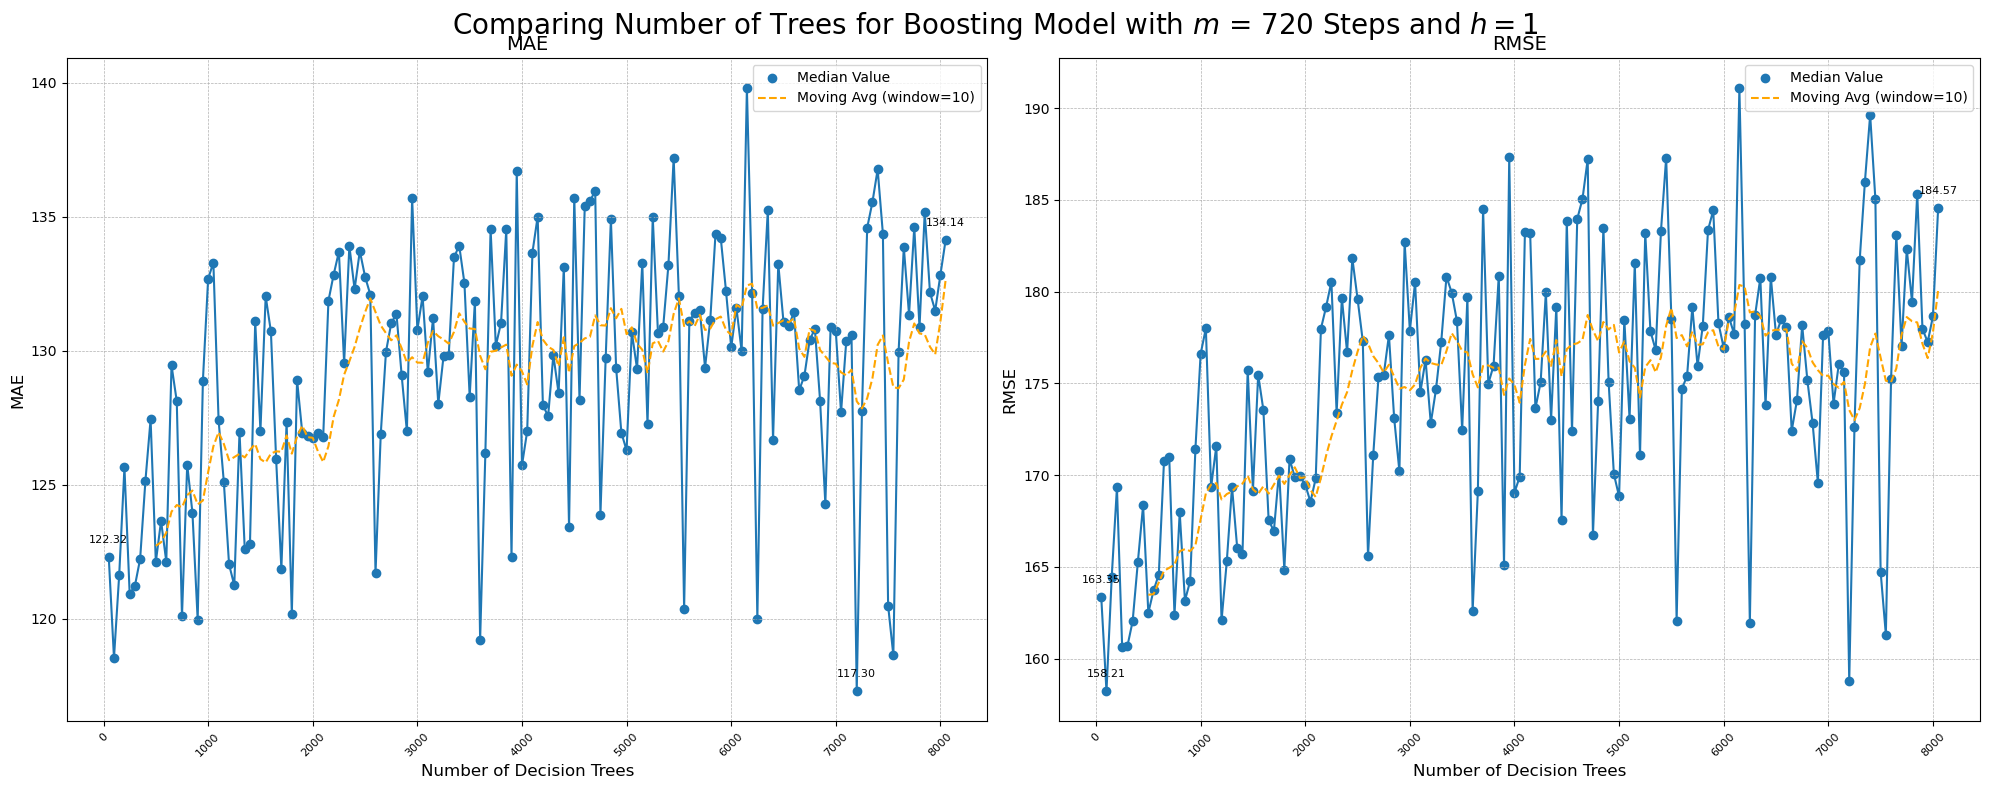

In [10]:
# Function to plot metrics for the ntree datasets with moving average
def plot_metric(ax, metric_name, window_size=10):
    median_metrics = {str(k): v[metric_name].median() for k, v in results.items()}
    df = pd.DataFrame(list(median_metrics.items()), columns=['ntree value', metric_name])
    df['ntree value'] = pd.to_numeric(df['ntree value'])

    # Calculate moving average
    df['Moving Average'] = df[metric_name].rolling(window=window_size).mean()

    # Scatter, line plot, and moving average plot
    ax.scatter(df['ntree value'], df[metric_name], color='#1f77b4', label='Median Value')
    ax.plot(df['ntree value'], df[metric_name], color='#1f77b4')
    ax.plot(df['ntree value'], df['Moving Average'], color='orange', linestyle='--', label=f'Moving Avg (window={window_size})')

    # Annotating only the minimum, maximum, and a few points if there are enough
    if len(df) > 2:
        selected_points = pd.concat([df.iloc[[0, -1]], df.loc[[df[metric_name].idxmin()]]])
    else:
        selected_points = df

    for _, row in selected_points.iterrows():
        ax.annotate(f"{row[metric_name]:.2f}", (row['ntree value'], row[metric_name]), 
                    textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

    ax.set_title(f'{metric_name}', fontsize=14)
    ax.set_xlabel('Number of Decision Trees', fontsize=12)
    ax.set_ylabel(f'{metric_name}', fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend()

# Create subplots for MAE and RMSE with moving averages
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plot_metric(ax1, 'MAE')
plot_metric(ax2, 'RMSE')

plt.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Comparing Number of Trees for Boosting Model with $m$ = 720 Steps and $h=1$', fontsize=20)

plt.show()